## SVM Classifier for forestfire Dataset

classify the Size_Categorie using SVM

### Data Description

* month: month of the year: 'jan' to 'dec'
* day:	day of the week: 'mon' to 'sun'
* FFMC:	FFMC index from the FWI system: 18.7 to 96.20
* DMC:	DMC index from the FWI system: 1.1 to 291.3
* DC:	DC index from the FWI system: 7.9 to 860.6
* ISI:	ISI index from the FWI system: 0.0 to 56.10
* temp:	temperature in Celsius degrees: 2.2 to 33.30
* RH:	relative humidity in %: 15.0 to 100
* wind:	wind speed in km/h: 0.40 to 9.40
* rain:	outside rain in mm/m2 : 0.0 to 6.4
* Size_Categorie: 	the burned area of the forest ( Small , Large)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
forest_df = pd.read_csv('forestfires.csv')

In [3]:
forest_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### EDA

<AxesSubplot:xlabel='size_category', ylabel='count'>

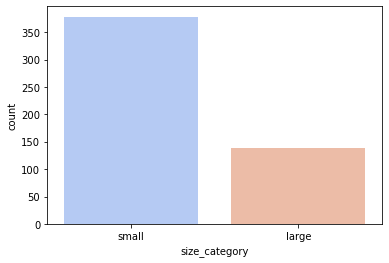

In [5]:
sns.countplot(x='size_category', data=forest_df, palette='coolwarm')

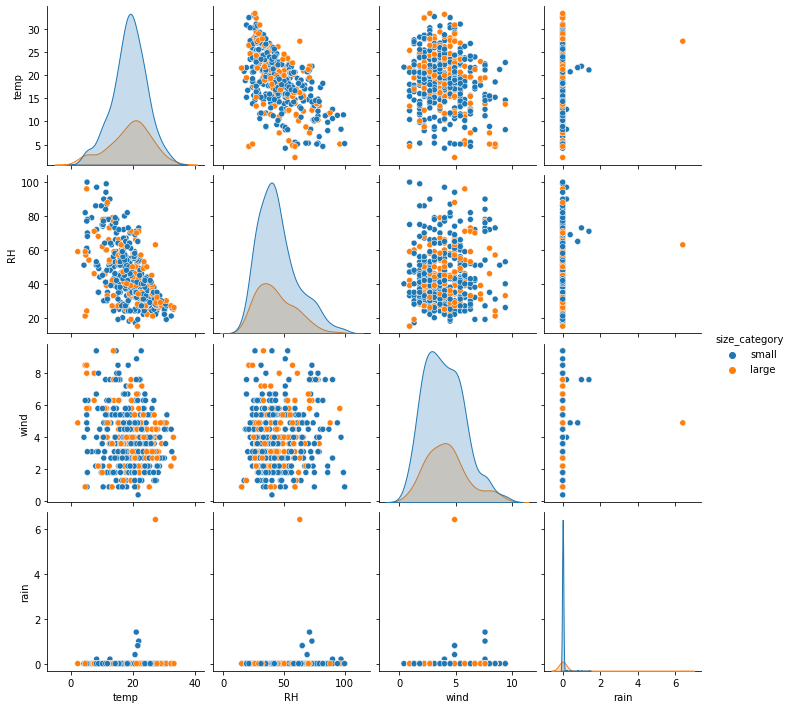

In [6]:
df = forest_df[['temp','RH','wind','rain','size_category']]
sns.pairplot(df, hue='size_category')

<AxesSubplot:xlabel='size_category', ylabel='temp'>

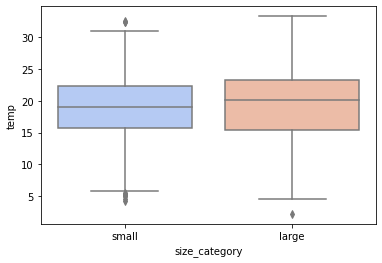

In [7]:
sns.boxplot(x='size_category',y='temp',data=forest_df, palette='coolwarm')

<AxesSubplot:xlabel='month', ylabel='wind'>

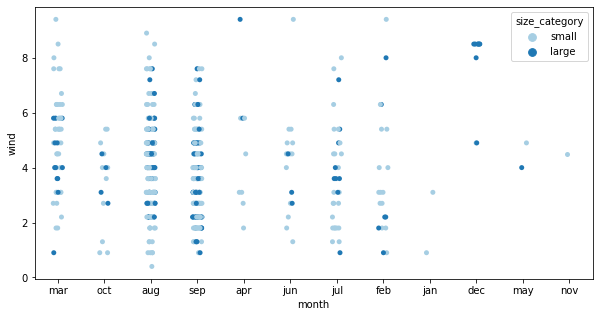

In [8]:
plt.figure(figsize=(10,5))
sns.stripplot(x='month', y='wind', hue='size_category', data=forest_df, palette='Paired')

<AxesSubplot:xlabel='month', ylabel='temp'>

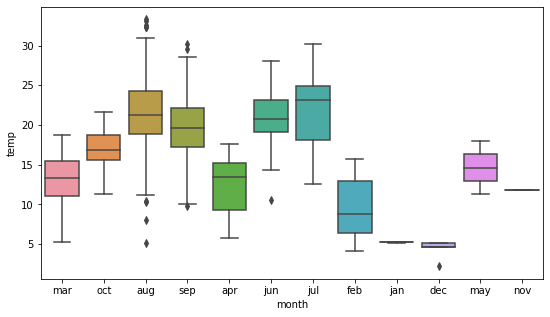

In [9]:
plt.figure(figsize=(9,5))
sns.boxplot(x='month', y='temp', data=forest_df)

<AxesSubplot:xlabel='DC', ylabel='DMC'>

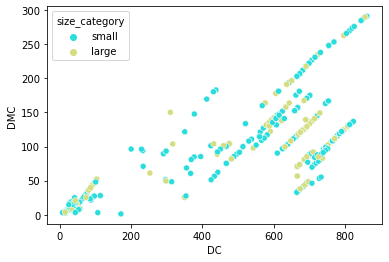

In [10]:
sns.scatterplot(x='DC', y='DMC', hue='size_category', data= forest_df, palette='rainbow')

<AxesSubplot:xlabel='ISI', ylabel='FFMC'>

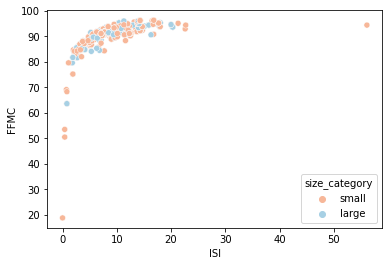

In [11]:
sns.scatterplot(x='ISI', y='FFMC', hue='size_category', data= forest_df, palette='RdBu')

In [12]:
forest_df.drop(['month','day'],axis=1, inplace=True)

In [13]:
forest_df['size_category'] = forest_df['size_category'].apply(lambda x: 0 if x=='small' else 1)

### Train Test Split

In [14]:
X = forest_df.drop('size_category',axis=1).astype(float)
y = forest_df['size_category'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train the Support Vector Classifier


In [16]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

### Predictions and Evaluations


In [17]:
predictions = svm_model.predict(X_test)

In [18]:
print(confusion_matrix(y_test,predictions))

[[115   0]
 [ 39   2]]


In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       115
           1       1.00      0.05      0.09        41

    accuracy                           0.75       156
   macro avg       0.87      0.52      0.47       156
weighted avg       0.81      0.75      0.65       156



### Model 2

In [20]:
X2 = forest_df.drop(['size_category','DC','DMC','FFMC','ISI'],axis=1).astype(float) #drop some features
y2 = forest_df['size_category'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [21]:
svm_model2 = SVC()

svm_model2.fit(X_train2, y_train2)

SVC()

In [24]:
predictions2 = svm_model2.predict(X_test2)

In [25]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       115
           1       1.00      0.68      0.81        41

    accuracy                           0.92       156
   macro avg       0.95      0.84      0.88       156
weighted avg       0.93      0.92      0.91       156



### GridSearch

In [26]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001], 'kernel': ['rbf']} 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [40]:
grid.fit(X_train2,y_train2)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.736 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.822 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.986 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 1/5] END .....C=1000, ga

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
grid.best_params_

{'C': 10000, 'gamma': 1e-05, 'kernel': 'rbf'}

In [42]:
grid.best_estimator_

SVC(C=10000, gamma=1e-05)

In [43]:
grid_predictions = grid.predict(X_test2)

In [44]:
print(confusion_matrix(y_test,grid_predictions))

[[114   1]
 [  1  40]]


In [45]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       115
           1       0.98      0.98      0.98        41

    accuracy                           0.99       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



Thank you!